### Import libraries

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.feature_extraction import DictVectorizer

In [2]:
#use jupyter display function to stack our visuals using markup
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for data,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=data.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [3]:
#load the dataset

data = pd.read_csv('C:/Users/HP/Desktop/Data Science Class/DWBC21/Capstone Project_Ebube/Churn_dataset.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#data hypothesis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#check unique values
data.nunique(axis=0).sort_values().to_frame()

,0
Gender,2
HasCrCard,2
IsActiveMember,2
Exited,2
Geography,3
NumOfProducts,4
Tenure,11
Age,70
CreditScore,460
Surname,2932


In [6]:
#Checking the shape the train dataset
data.shape

(10000, 14)

In [7]:
dataset=data.drop(['RowNumber','CustomerId', 'Surname'],axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Visualization

In [8]:
#visualize target variables for relationship
corr = dataset.corr()
corr


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


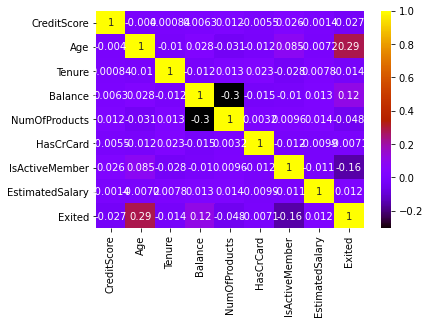

In [9]:
dataplot = sns.heatmap(corr, cmap="gnuplot", annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

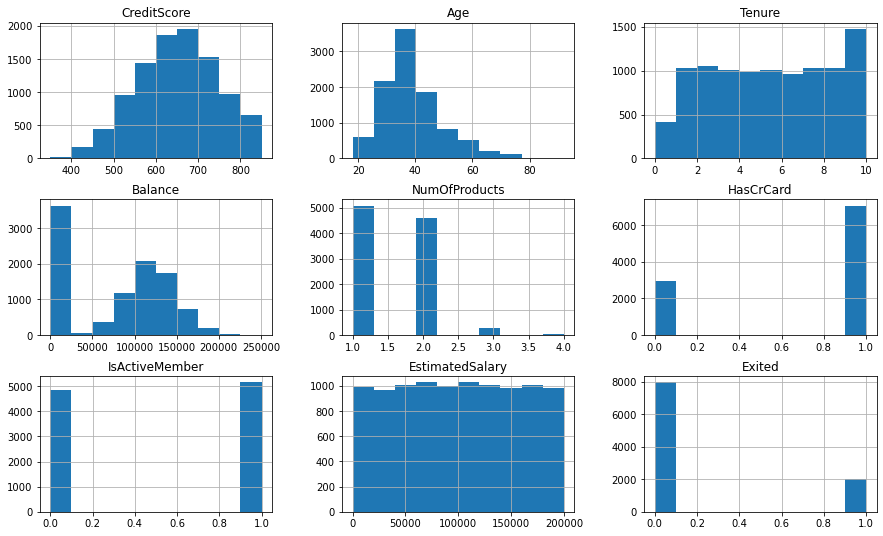

In [10]:
dataset.hist(figsize = (15,9))

The histograms above show that the features are not normally distributed. Therefore, I will treat them through standardization

### Data Wrangling

In [11]:
# describing the dataset
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
#data cleaning
#check the number of null value as a sum from all columns
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# Change the columns name
dataset.rename(columns={"CreditScore":"cd_scr","Geography":"geo","Gender": "gender","Age":"age","Tenure":"tenure","Balance":"bal","NumOfProducts":"num_of_prd","HasCrCard":"has_cr_cd","IsActiveMember":"is_actv_membr","EstimatedSalary":"est_sal","Exited":"exited"},inplace=True)

In [14]:
dataset.head()

,cd_scr,geo,gender,age,tenure,bal,num_of_prd,has_cr_cd,is_actv_membr,est_sal,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# duplicate the dataset
train_data = dataset.copy()

In [16]:
train_data.head()

,cd_scr,geo,gender,age,tenure,bal,num_of_prd,has_cr_cd,is_actv_membr,est_sal,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
#check for unique values
train_data.geo.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
#check for unique values
train_data.gender.unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:>

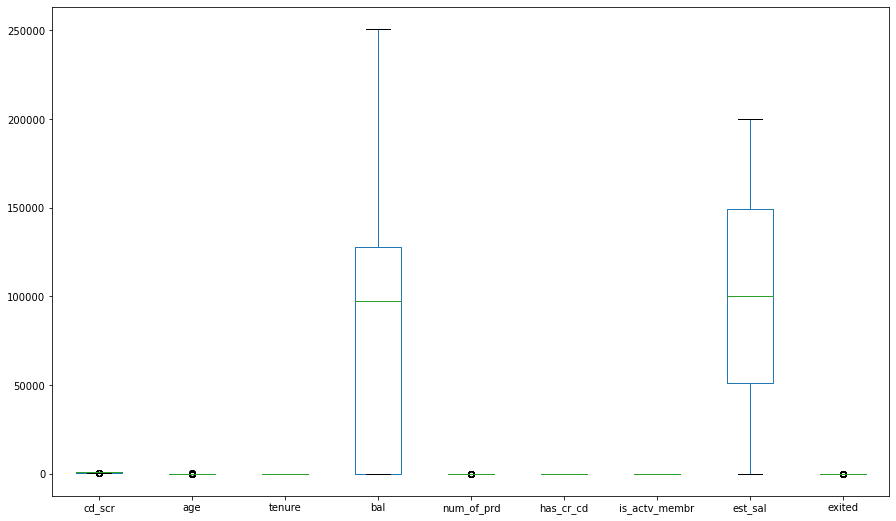

In [19]:
#data preprocessing
train_data.plot(kind='box', figsize= (15,9)) #lets identify outliers. absence of circles in the boxplot means that our dataset is fair and there are no outliers

In [20]:
###Treating Outliers

In [21]:
#quarter is in 4 places: 0,25,50,75
#Q3 = train_data.quantile(0.75)
#CQT = Q3-Q1
#outlier = (train_data < (Q1 - 1.5 * CQT)) | (train_data > (Q3 + 1.5 * CQT))

In [22]:
#treated_data = train_data[~(outlier).any(axis=1)]
#treated_data.plot(kind="box", figsize=(15,9))

In [23]:
#treated_data .shape

### Feature Engineering

In [24]:
#hot encoding
#create dummies for geo column
geo_dummy = pd.get_dummies(train_data['geo'],prefix_sep='_', prefix='geo')
geo_dummy.head()

,geo_France,geo_Germany,geo_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [25]:
#merge encoded columns and train_dataset column
train_dataset = pd.concat([train_data,geo_dummy], axis=1)
train_dataset

,cd_scr,geo,gender,age,tenure,bal,num_of_prd,has_cr_cd,is_actv_membr,est_sal,exited,geo_France,geo_Germany,geo_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [26]:
#drop country column
train_dataset.drop('geo',axis=1,inplace=True)
train_dataset.head()

,cd_scr,gender,age,tenure,bal,num_of_prd,has_cr_cd,is_actv_membr,est_sal,exited,geo_France,geo_Germany,geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [27]:
#label encoding
#label encoding for gender
le = LabelEncoder()
train_dataset['gender'] = le.fit_transform(train_dataset['gender'])
train_dataset.head()

,cd_scr,gender,age,tenure,bal,num_of_prd,has_cr_cd,is_actv_membr,est_sal,exited,geo_France,geo_Germany,geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [28]:
y = train_dataset.pop('exited')
y = np.array(y)
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [29]:
X = train_dataset.iloc[:,0].values
X = np.reshape(X,newshape=(-1,1))
X

array([[619],
       [608],
       [502],
       ...,
       [709],
       [772],
       [792]], dtype=int64)

In [30]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
#print variable shapes to confirm they're equal
print(X_train.shape, y_train.shape)

(8000, 1) (8000,)


In [32]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modelling

In [33]:
#load model
#Random Forest Algorithm
rfc = RandomForestClassifier(n_estimators=20, random_state=0)

In [34]:
#fit/train model
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [35]:
#make prediction on the X_test
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#rfc.predict([[608,0,41,1,83807.86,1,0,1,112542.58,0,0,1]])

##ss = DictVectorizer()
#input_data = ss.fit_transform(["cd_scr":608,"gender":0,"age":41,"tenure":1,"bal":83807.86,"num_of_prd":0,"has cr_cd":0, "is_actv_membr":1,"est_sa":1112542.58,"geo_France":0,"geo_Germany":0,"geo_Spain":1])
#input_data

#Create a function to test our model
#def  postpreprossesing(pred):
    #label = "exited"
    #if pred[1] > 0.1 :
        #label = "No exit"
        #return{"probability of exiting": pred[1] , "label" :label , "status" : "OK"}

In [37]:
#load model
#K-Nearest Neighbor Algorithm
knc = KNeighborsClassifier(n_neighbors=5)

In [38]:
#fit/train model
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#make prediction on the X_test
y_pred_knc = knc.predict(X_test)
y_pred_knc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
#load model
#Support Vector Machine
svmc = svm.SVC(kernel='linear') # Linear Kernel

In [41]:
#fit/train model
svmc.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
#make prediction on the X_test
y_pred_svmc = svmc.predict(X_test)

### Model Evaluation

In [43]:
#check model accuracy

print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_rfc))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_rfc))

[[1591   16]
 [ 385    8]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.33      0.02      0.04       393

    accuracy                           0.80      2000
   macro avg       0.57      0.51      0.46      2000
weighted avg       0.71      0.80      0.72      2000

Accuracy: 0.7995
Precision: 0.3333333333333333
Recall: 0.020356234096692113


In [44]:
#check model accuracy

print(confusion_matrix(y_test,y_pred_knc))
print(classification_report(y_test,y_pred_knc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knc))

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred_knc))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred_knc))

[[1552   55]
 [ 368   25]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1607
           1       0.31      0.06      0.11       393

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.49      2000
weighted avg       0.71      0.79      0.73      2000

Accuracy: 0.7885


In [45]:
#check model accuracy

print(confusion_matrix(y_test,y_pred_svmc))
print(classification_report(y_test,y_pred_svmc))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svmc))

# Model Precision: what percentage of positive tuples are labeled as such?
#print("Precision:",metrics.precision_score(y_test, y_pred_svmc))

# Model Recall: what percentage of positive tuples are labelled as such?
#print("Recall:",metrics.recall_score(y_test, y_pred_svmc))

[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Accuracy: 0.8035


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Make predictions with Random Forest Classifier

In [62]:
#convert data into a dataframe for a machine learning model
input_data ={
    'cd_scr': 608,'gender':0,'age':41,'tenure':1,'bal':83807.86,'num_of_prd':0,'has cr_cd':0, 'is_actv_membr':1,'est_sa':1112542.58,'geo_France':0,'geo_Germany':0,'geo_Spain':1}
input_data = pd.DataFrame(input_data,index =[0])
input_data

,cd_scr,gender,age,tenure,bal,num_of_prd,has cr_cd,is_actv_membr,est_sa,geo_France,geo_Germany,geo_Spain
0,608,0,41,1,83807.86,0,0,1,1112542.58,0,0,1


In [63]:
input_data = sc.fit_transform(input_data)
input_data

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [72]:
#Create a function to test our model
def  postpreprossesing(y_pred_rfc):
    label = "exited"
    if y_pred_rfc[1] > 0.99 :
        label = "No exit"
        return{"probability of exiting": y_pred_rfc[1] , "label" :label , "status" : "OK"}

# Inference and Conclusion

Accuracy: Among the three models used for the classification, support vector machine gave the highest accuracy (80.35%). 
Recall: svm gave recall value of 100%, random forest gave 99%, knn gave 97%.
Precision: KNN and random forest classifiers  gave the same precision value (81%) which is higher than that of svm.
Fi scre: svm and random forest classifiers gave the same f1 score (89%) which is higher than that of KNN.

Additionally, it was observed that there is a low correlation between the independent variables and dependent variable, with age showing the highest effect on the dependent variable (corrrelation = 0.285323), and having credit card has the lowest effect on the dependent variable (correlation = 0.007138). 

However, some of the features like tenure, has credit card, credit score inversely affects the exit status of the individuals
    
In conclusion, I would adopt the model developed with random forest classifier as it is 80% accurate, has 81% chance of identifing only the relevant data points (precision), and  has 99% chance of finding all the relevant cases within the data set (recall) which is higher than 97% given by Knn and more realistic than the 100% given by svm.

The low correlation is an obvous indication that there are some necessary features that affect exit status which are not captured in our dataset. I would recommend that more research be carried out to identify these features.


